Problem:

A population of U surgeons receive N notifications at specific times during the day. You are given a CSV containing a list of pairs (surgeon, notification_time) to show who receives a notification and when. The similarity between surgeons is defined as "how close in time they tend to receive notifications". As an example, if surgeon A and surgeon B both receive lots of notifications around 12:00 and not much during the rest of the day, they have a high mutual similarity. If surgeon C receives most notifications spread over the evening and not much around 12:00 she has low
similarity to both surgeon A and B.

Please explain how you could quantify similarity(surgeon1, surgeon2) mathematically and implement
a program that, given the attached CSV, will find the two most similar users.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [3]:
df1 = pd.read_csv("./testdata_exercise1.csv", header = None)
col_names1 = ['surgeon', 'notification_time']
df1.columns = col_names1
df1.head(5)

,surgeon,notification_time
0,user4,06:39:22
1,user3,08:31:20
2,user3,14:22:14
3,user1,20:22:44
4,user3,06:02:54


In [4]:
# Assigning each notification time to the hour of the day
df1['hour'] = (pd.to_timedelta(df1['notification_time']).astype('timedelta64[h]').astype(int))
df1['hour'] = df1['hour']
df1.head(5)

,surgeon,notification_time,hour
0,user4,06:39:22,6
1,user3,08:31:20,8
2,user3,14:22:14,14
3,user1,20:22:44,20
4,user3,06:02:54,6


In [5]:
# Grouping the number of notifications by hour and by surgeon
df1_count = df1.groupby(['surgeon','hour']).count()
df1_count = df1_count.reset_index()
df1_count = df1_count.rename(columns={'notification_time':'count'})
df1_count

,surgeon,hour,count
0,user0,3,1
1,user0,4,2
2,user0,5,4
3,user0,6,1
4,user0,7,1
...,...,...,...
128,user7,12,16
129,user7,13,15
130,user7,14,8
131,user7,15,12


In [6]:
# Now to create a 24 length vector for each surgeon that prints the number of notifications in each hour
# The vector will also be normalised
def foo(user, df):
    user_df = df[df['surgeon']==user]
    user_his = np.zeros(24)
    
    for index, row in user_df.iterrows():
        hour = row['hour']
        count = row['count']
        user_his[hour] = count
    
    tot = user_his.sum()
    norm = user_his/tot
    
    return norm

foo('user0', df1_count)

array([0.     , 0.     , 0.     , 0.03125, 0.0625 , 0.125  , 0.03125,
       0.03125, 0.03125, 0.0625 , 0.     , 0.125  , 0.     , 0.09375,
       0.     , 0.03125, 0.0625 , 0.03125, 0.09375, 0.03125, 0.03125,
       0.09375, 0.03125, 0.     ])

In [7]:
# Create a dictionary with the normalised vectors for each surgeon
df1_24hr = {}

In [8]:
for user in df1_count['surgeon'].unique():
    value = foo(user, df1_count)
    df1_24hr[user] = value

In [9]:
df1_24hr

{'user0': array([0.     , 0.     , 0.     , 0.03125, 0.0625 , 0.125  , 0.03125,
        0.03125, 0.03125, 0.0625 , 0.     , 0.125  , 0.     , 0.09375,
        0.     , 0.03125, 0.0625 , 0.03125, 0.09375, 0.03125, 0.03125,
        0.09375, 0.03125, 0.     ]),
 'user1': array([0.03614458, 0.06024096, 0.03614458, 0.01204819, 0.03614458,
        0.01204819, 0.03614458, 0.02409639, 0.02409639, 0.01204819,
        0.04819277, 0.        , 0.        , 0.10843373, 0.20481928,
        0.09638554, 0.03614458, 0.        , 0.04819277, 0.02409639,
        0.07228916, 0.01204819, 0.01204819, 0.04819277]),
 'user2': array([0.        , 0.        , 0.01960784, 0.03921569, 0.05882353,
        0.01960784, 0.03921569, 0.07843137, 0.        , 0.03921569,
        0.03921569, 0.01960784, 0.07843137, 0.03921569, 0.03921569,
        0.03921569, 0.01960784, 0.01960784, 0.01960784, 0.25490196,
        0.1372549 , 0.        , 0.        , 0.        ]),
 'user3': array([0.04545455, 0.03030303, 0.01515152, 0.06060606

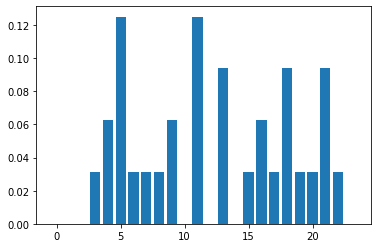

In [12]:
# Example of normalised histogram for surgeon user0
plt.bar(x=np.arange(len(df1_24hr['user0'])), height=df1_24hr['user0'])
plt.show()

In [13]:
# KL divergence function
def KL(P,Q):
    epsilon = 0.00001
    P = P+epsilon
    Q = Q+epsilon

    divergencepq = np.sum(P*np.log(P/Q))
    divergenceqp = np.sum(Q*np.log(Q/P))
    # added to ensure symmetry
    return "%.2f" % (divergencepq + divergenceqp)

In [14]:
# Program to find the 2 most similar users

In [15]:
print(df1_count['surgeon'].unique())

['user0' 'user1' 'user2' 'user3' 'user4' 'user5' 'user6' 'user7']


In [16]:
all_combs = []

In [17]:
# List of unique surgeons
surgeon = df1_count['surgeon'].unique()

In [20]:
for combo in combinations(surgeon, 2):
    all_combs += [combo]

In [21]:
user_df = pd.DataFrame(columns = ['Surgeon1','Surgeon2','DL score'])

In [22]:
# Create a dataframe with the surgeon combinations and their similarity scores
sim_dict = {'Surgeon1':[],'Surgeon2':[],'DL score':[]}
for comb in all_combs:
    sim = KL(df1_24hr[comb[0]], df1_24hr[comb[1]])
    sim_dict['Surgeon1'].append(comb[0])
    sim_dict['Surgeon2'].append(comb[1])
    sim_dict['DL score'].append(sim)

In [23]:
user_df = pd.DataFrame(sim_dict)
user_df.head()

,Surgeon1,Surgeon2,DL score
0,user0,user1,6.12
1,user0,user2,4.16
2,user0,user3,4.22
3,user0,user4,5.62
4,user0,user5,6.74


In [24]:
user_df['DL score'] = user_df['DL score'].astype(float)

In [25]:
# Print pair of users with min KL divergence (max similarity)
user_df[user_df['DL score'] == user_df['DL score'].min()]

,Surgeon1,Surgeon2,DL score
27,user6,user7,0.1
